In [1]:
from dask_yarn import YarnCluster
from dask.distributed import Client
cluster = YarnCluster()
client = Client(cluster)
client

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://172.31.69.30:41759
distributed.scheduler - INFO -   dashboard at:                    :33669
distributed.scheduler - INFO - Receive client connection: Client-dc1e922e-8d42-11ea-b342-163bb3a0545d
distributed.core - INFO - Starting established connection


Client Scheduler: tcp://172.31.69.30:41759 Dashboard: /proxy/33669/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [2]:
import ipywidgets
cluster

In [3]:
cluster.scale(8)

In [4]:
import dask
import dask.dataframe as dd

In [5]:
# read the data
df = dd.read_parquet("s3://finalproject502/df.parquet")

distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.189:35693', name: dask.worker_6, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.75.189:35693
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.189:35449', name: dask.worker_0, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.75.189:35449
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.250:35247', name: dask.worker_2, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.75.250:35247
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.250:38939', name: dask.worker_3, memory: 0, processing: 0>
distributed.scheduler - INFO - Star

In [6]:
df

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
npartitions=610,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float32,int32,int32,int32,float32,object,object,object,object,float32,float32,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
# take columns of Actor1Name and Actor2Name, and drop null values
ddf = df.iloc[:,[6, 16]]
ddf = ddf[(ddf.Actor1Name != "") & (ddf.Actor2Name != "")]
ddf

,Actor1Name,Actor2Name
npartitions=610,,
,object,object
,...,...
...,...,...
,...,...
,...,...


In [9]:
len(ddf)

47038129

In [10]:
# get Actor1Name of top 10 appearance
ddf.Actor1Name.value_counts().head(10)

UNITED STATES     4321799
POLICE             863505
UNITED KINGDOM     782992
PRESIDENT          660532
CHINA              648416
GOVERNMENT         601184
RUSSIA             582202
PAKISTAN           430271
SCHOOL             429115
TURKEY             415600
Name: Actor1Name, dtype: int64

In [11]:
# get Actor1Name of top 10 appearance
ddf.Actor2Name.value_counts().head(10)

UNITED STATES     4051204
GOVERNMENT         793826
UNITED KINGDOM     738785
POLICE             700596
CHINA              654592
PRESIDENT          593424
SCHOOL             572611
RUSSIA             560382
SYRIA              508875
PAKISTAN           443187
Name: Actor2Name, dtype: int64

In [20]:
# Make a list of top 10 ActorName
A1 = ['UNITED STATES', 'POLICE', 'UNITED KINGDOM', 'PRESIDENT', 'CHINA', 'GOVERNMENT', 'RUSSIA', 'PAKISTAN', 'SCHOOL', 'TURKEY']
A2 = ['UNITED STATES', 'GOVERNMENT', 'UNITED KINGDOM', 'POLICE', 'CHINA', 'PRESIDENT', 'SCHOOL', 'RUSSIA', 'SYRIA', 'PAKISTAN']

In [21]:
ddf1 = ddf[(ddf.Actor1Name == 'UNITED STATES') | (ddf.Actor1Name == 'POLICE') | (ddf.Actor1Name == 'UNITED KINGDOM') | \
           (ddf.Actor1Name == 'PRESIDENT') | (ddf.Actor1Name == 'CHINA') | (ddf.Actor1Name == 'GOVERNMENT') | \
           (ddf.Actor1Name == 'RUSSIA') | (ddf.Actor1Name == 'PAKISTAN') | (ddf.Actor1Name == 'SCHOOL') | \
           (ddf.Actor1Name == 'TURKEY')]

In [22]:
ddf2 = ddf1[(ddf1.Actor2Name == 'UNITED STATES') | (ddf1.Actor2Name == 'GOVERNMENT') | (ddf1.Actor2Name == 'UNITED KINGDOM') | \
           (ddf1.Actor2Name == 'POLICE') | (ddf1.Actor2Name == 'CHINA') | (ddf1.Actor2Name == 'PRESIDENT') | \
            (ddf1.Actor2Name == 'SCHOOL') | (ddf1.Actor2Name == 'RUSSIA') | (ddf1.Actor2Name == 'SYRIA') | \
            (ddf1.Actor2Name == 'PAKISTAN')]

plot the network from Actor1Code with top 5 appearance

In [24]:
# Create the graph
g1 = nx.from_pandas_edgelist(ddf2, source = 'Actor1Name', target = 'Actor2Name') 
g2 = nx.from_pandas_edgelist(ddf2, source = 'Actor2Name', target = 'Actor1Name') 

distributed.utils_perf - INFO - full garbage collection released 3.10 GB from 1345 reference cycles (threshold: 10.00 MB)


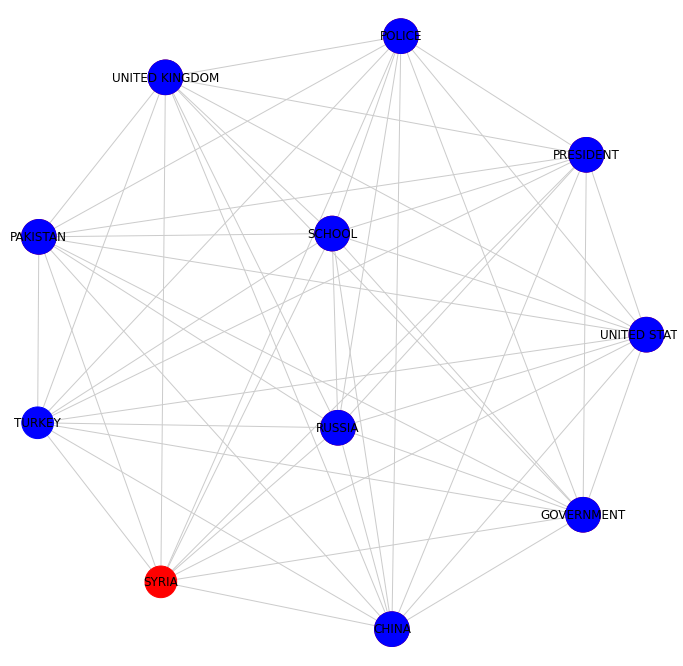

In [33]:
plt.figure(figsize=(12, 12))

# Create a layout for our nodes 
layout = nx.spring_layout(g1, iterations = 500)

# Draw the parts we want

# Draw EVERYONE
size2 = [g2.degree(a)*100 for a in A2]
nx.draw_networkx_nodes(g1, layout, nodelist = A2, node_color = 'red', node_size = size2)

size1 = [g1.degree(a)*100 for a in A1]
nx.draw_networkx_nodes(g1, layout, nodelist = A1, node_size = size1, node_color = 'blue')

nx.draw_networkx_edges(g1, layout, width = 1, edge_color = "#cccccc")

node_labels = dict(zip(A1 + A2, A1 + A2))
nx.draw_networkx_labels(g1, layout, labels = node_labels)

plt.axis('off')
plt.show()

In [29]:
[g1.degree(a)*10 for a in A1]

[120, 120, 120, 120, 120, 120, 120, 120, 120, 100]